Parameter containing:
tensor([[0.0345]], requires_grad=True)
Parameter containing:
tensor([0.3190], requires_grad=True)


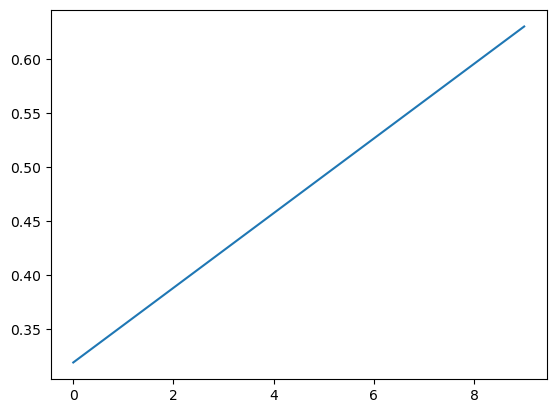

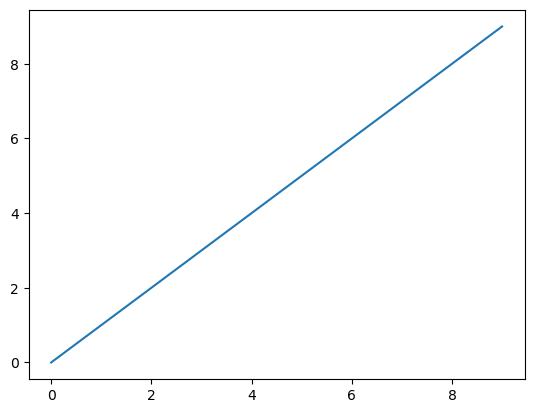

Parameter containing:
tensor([[0.8555]], requires_grad=True)
Parameter containing:
tensor([-0.6635], requires_grad=True)
Epoch 1, Training loss 212.4273, Validation loss 196.9092
Epoch 1000, Training loss 3.5716, Validation loss 2.5758
Epoch 2000, Training loss 3.0438, Validation loss 2.5048
Epoch 3000, Training loss 3.0355, Validation loss 2.4961

Parameter containing:
tensor([[5.3718]], requires_grad=True)
Parameter containing:
tensor([-17.2271], requires_grad=True)
Epoch 1, Training loss 135.7262, Validation loss 108.9970
Epoch 1000, Training loss 3.6017, Validation loss 2.5782
Epoch 2000, Training loss 3.0443, Validation loss 2.5051
Epoch 3000, Training loss 3.0355, Validation loss 2.4962

Parameter containing:
tensor([[5.3716]], requires_grad=True)
Parameter containing:
tensor([-17.2262], requires_grad=True)
0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])
Epoch 1, Training loss 197.0600, Validation loss 181.3566
Epoch 1000, 

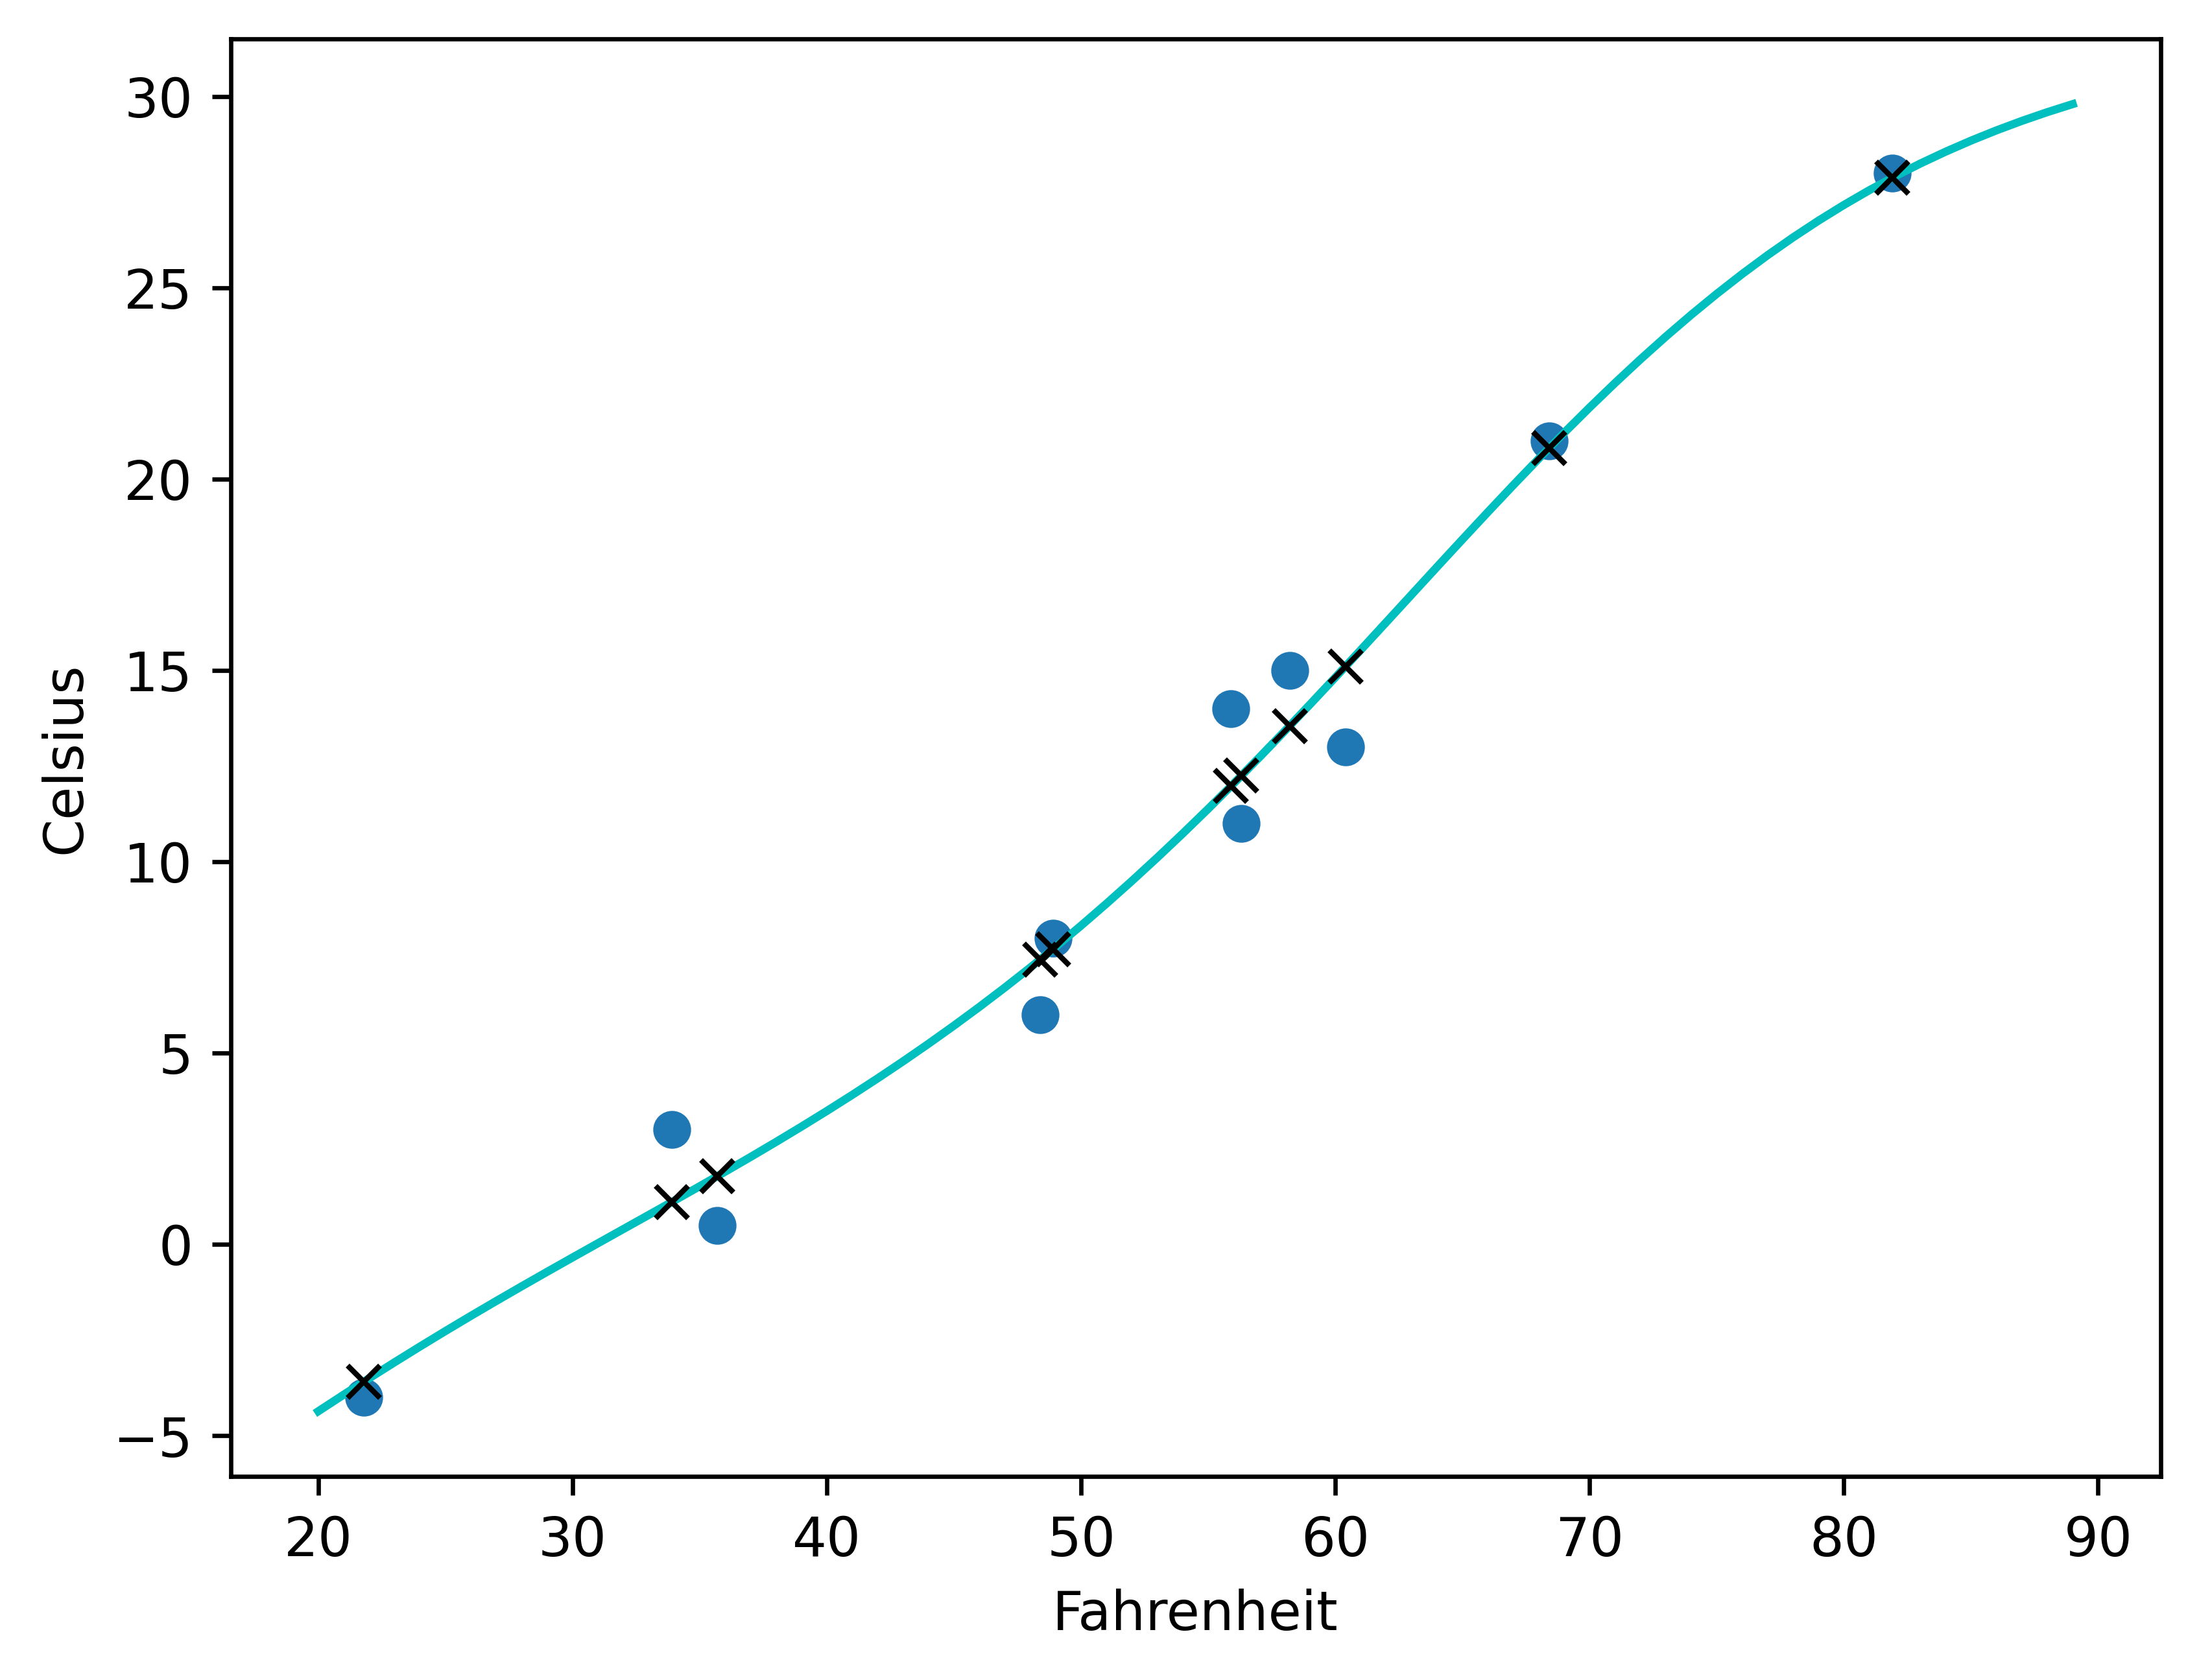

In [1]:
import numpy as np
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

import torch.nn as nn

linear_model = nn.Linear(1, 1)

print(f'{linear_model.weight}')
print(f'{linear_model.bias}')

batch = torch.arange(0,10, dtype=torch.float).unsqueeze(1)
res = linear_model(batch).detach().numpy()
plt.plot(res)
plt.show()

# with torch.no_grad():
linear_model.bias = nn.Parameter(torch.tensor([[0]], dtype=torch.float))
linear_model.weight = nn.Parameter(torch.tensor([[1]], dtype=torch.float))
batch = torch.arange(0,10, dtype=torch.float).unsqueeze(1)
res = linear_model(batch).detach().numpy()
plt.plot(res)
plt.show()


torch.set_printoptions(edgeitems=2, linewidth=75)
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

t_u.shape


n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val



linear_model = nn.Linear(1, 1) # <1>
linear_model(t_un_val)
print(f'{linear_model.weight}')
print(f'{linear_model.bias}')
x = torch.ones(10, 1)
linear_model(x)


linear_model = nn.Linear(1, 1) # <1>
optimizer = optim.SGD(
    linear_model.parameters(), # <2>
    lr=1e-2)
list(linear_model.parameters())




def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) # <1>
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val) # <1>
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")
            
            
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

linear_model = nn.Linear(1, 1) # <1>
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = loss_fn,
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)



linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(), # <1>
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)


seq_model = nn.Sequential(
            nn.Linear(1, 13), # <1>
            nn.Tanh(),
            nn.Linear(13, 1)) # <2>
seq_model



for name, param in seq_model.named_parameters():
    print(name, param.shape)


from collections import OrderedDict

hidden_neurons = 8

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, hidden_neurons)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(hidden_neurons, 1))
]))

seq_model



optimizer = optim.SGD(seq_model.parameters(), lr=1e-3) # <1>

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)
    
print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)



from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')


Epoch 1, Training loss 197.8841, Validation loss 182.5043
Epoch 1000, Training loss 33.5331, Validation loss 5.1658
Epoch 2000, Training loss 18.6908, Validation loss 19.9571
Epoch 3000, Training loss 16.8333, Validation loss 30.3602
Epoch 4000, Training loss 14.2361, Validation loss 29.4275
Epoch 5000, Training loss 13.7323, Validation loss 29.5515


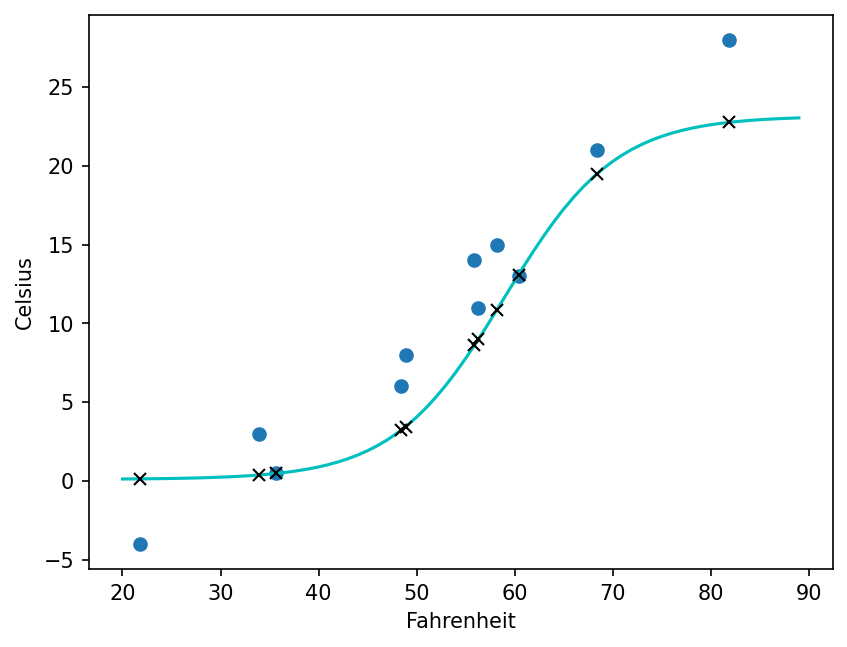

In [2]:
# Welche Änderungen führen zu einem linearen Ausgangsverhalten?


hidden_neurons = 1
lr = 1e-3

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, hidden_neurons)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(hidden_neurons, 1))
]))

optimizer = optim.SGD(seq_model.parameters(), lr)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=150)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')    



Epoch 1, Training loss 202.9297, Validation loss 189.0402
Epoch 1000, Training loss 194.3771, Validation loss 177.9769
Epoch 2000, Training loss 186.4651, Validation loss 167.6523
Epoch 3000, Training loss 179.1535, Validation loss 158.0246
Epoch 4000, Training loss 172.3968, Validation loss 149.0446
Epoch 5000, Training loss 166.1528, Validation loss 140.6665


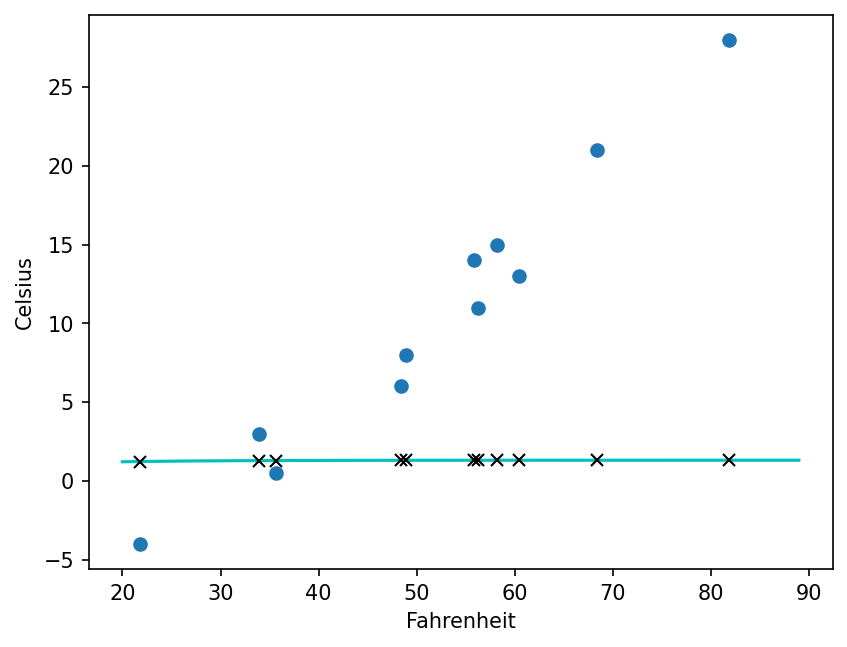

In [3]:
## Welche Veränderungen führen zu Overfitting?


hidden_layers = 200
lr = 1e-5

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, hidden_neurons)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(hidden_neurons, 1))
]))

optimizer = optim.SGD(seq_model.parameters(), lr)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=150)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')



Zu linearem Verhalten führt nur eine Schicht von Neuronen, weil dann Eingang und Ausgang direkt miteinander verknüpft sind. In unserem Fall sehen wir dann den Verlauf der Aktivierungsfunktion. Overfitting wird durch eine große Anzahl an Schichten, aber auch durch eine zu hohe Lernrate herbeigeführt.